In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import SimpleRNN
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

Using TensorFlow backend.


In [2]:
# 乱数の初期化
np.random.seed(0)

In [4]:
#サンプルの波形
def sin(x, T=100):
    """
    y = sin(2πx)
    """
    return np.sin(2.0 * np.pi * x / T)

In [8]:
def toy_problem(T=100,ampl=0.5,A=1):
    """
    sinの関数を使ってサンプルのデータを作成
    T    : 時間
    ampl : ノイズ率
    A    : 関数の最大値
    """
    x = np.arange(0,2*T+1)
    noise = ampl * np.random.uniform(low=1.0,high=1.0,size=len(x))
    return (A*sin(x)) + noise

In [15]:
# 学習させるデータを作成してみる
f = toy_problem()
length_of_sequences = len(f) -1
max_length = 25

data = []   # 入力データ 例:[[1,2,3],[2,3,4],[3,4,5],...]
target = [] # 出力データ 例:[4,5,6,7,...]

for i in range(0,length_of_sequences - max_length + 1):
    data.append(f[i:i+max_length])
    target.append(f[i+max_length])

In [24]:
print("入力データセットの一つのデータの長さは{}で全データの数は{}".format(len(data[0]),len(data)))
print("入力データセットの一つのデータの長さは1で全データの数は{}".format(len(data)))

入力データセットの一つのデータの長さは25で全データの数は176
入力データセットの一つのデータの長さは1で全データの数は176


In [28]:
# データをnumpy型に変換
# 入力しやすいようにreshapeで整形
X = np.array(data).reshape(len(data),max_length,1)
Y = np.array(target).reshape(len(target),1)

In [33]:
# scikit learnのデータ分割のメソッドtrain_test_splitを使ってデータの分割を行う
num_train = int(len(data) * 0.9)
num_validation = len(data) - num_train

X_train , X_validatioin,Y_train,Y_validation = train_test_split(X,Y,test_size=num_validation)

In [83]:
class MyRNN:
    def __init__(self,num_input=1,num_hidden=20,num_output=1,
                 epochs=500,batch_size=10):
        self.num_input = num_input
        self.num_hidden = num_hidden
        self.num_output = num_output
        self.epochs = epochs
        self.batch_size = batch_size
    def toy_problem(T=100,ampl=0.5,A=1):
        """
        sinの関数を使ってサンプルのデータを作成
        T    : 時間
        ampl : ノイズ率
        A    : 関数の最大値
        """
        x = np.arange(0,2*T+1)
        noise = ampl * np.random.uniform(low=1.0,high=1.0,size=len(x))
        wave = (A*sin(x)) + noise
        return wave
    def weight_variable(self,shape=0.01):
        return np.random.normal(scale=0.01,size=shape)
    def create_model(self):
        self.model = Sequential()
        self.model.add(SimpleRNN(
            self.num_hidden,
            kernel_initializer=self.weight_variable,
            input_shape=(max_length,self.num_input))
                      )
        self.model.add(Dense(self.num_output,kernel_initializer=self.weight_variable))
        self.model.add(Activation('linear'))
                       
        optimizer = Adam(lr=0.001,beta_1=0.9,beta_2 = 0.999)
        self.model.compile(loss='mean_squared_error',optimizer=optimizer)
        
    def train(self):
        self.model.fit(
            X_train,
            Y_train,
            batch_size=self.batch_size,
            epochs=self.epochs,
            validation_data = (X_validatioin,Y_validation)
        )
    def test(self):
        truncate = max_length
        Z = X[:1]
        original = []
        predicted = []
        for i in range(max_length):
            original.append(f[i])
            predicted.append(None)
        for i in range(length_of_sequences - max_length + 1):
            z_ = Z[-1:]
            y_ = self.model.predict(z_)
        sequence_ = np.concatenate(
            (z_.reshape(max_length, self.num_input)[1:], y_),
            axis=0).reshape(1, max_length, self.num_input)
        Z = np.append(Z, sequence_, axis=0)
        predicted.append(y_.reshape(-1))

        plt.figure()
        plt.ylim([-1.5,1.5])
        plt.plot(toy_problem())
        plt.show()
        plt.plot(original)
        plt.show()
        plt.plot(predicted)
        plt.show()
            
        

In [84]:
rnn = MyRNN()

In [85]:
rnn.create_model()

In [86]:
rnn.train()

Train on 158 samples, validate on 18 samples
Epoch 1/500
158/158 [==============================] - 0s 3ms/step - loss: 0.6034 - val_loss: 0.6656
Epoch 2/500
158/158 [==============================] - 0s 264us/step - loss: 0.5011 - val_loss: 0.5638
Epoch 3/500
158/158 [==============================] - 0s 302us/step - loss: 0.4683 - val_loss: 0.5039
Epoch 4/500
158/158 [==============================] - 0s 262us/step - loss: 0.3578 - val_loss: 0.3823
Epoch 5/500
158/158 [==============================] - 0s 263us/step - loss: 0.2246 - val_loss: 0.1815
Epoch 6/500
158/158 [==============================] - 0s 255us/step - loss: 0.1281 - val_loss: 0.1213
Epoch 7/500
158/158 [==============================] - 0s 269us/step - loss: 0.0859 - val_loss: 0.0901
Epoch 8/500
158/158 [==============================] - 0s 265us/step - loss: 0.0627 - val_loss: 0.0667
Epoch 9/500
158/158 [==============================] - 0s 253us/step - loss: 0.0430 - val_loss: 0.0450
Epoch 10/500
158/158 [========

Epoch 150/500
158/158 [==============================] - 0s 272us/step - loss: 7.2894e-05 - val_loss: 1.1956e-04
Epoch 151/500
158/158 [==============================] - 0s 258us/step - loss: 6.9915e-05 - val_loss: 3.9631e-05
Epoch 152/500
158/158 [==============================] - 0s 255us/step - loss: 5.0292e-05 - val_loss: 6.3770e-05
Epoch 153/500
158/158 [==============================] - 0s 267us/step - loss: 1.0773e-04 - val_loss: 2.4198e-04
Epoch 154/500
158/158 [==============================] - 0s 275us/step - loss: 1.7266e-04 - val_loss: 2.0589e-04
Epoch 155/500
158/158 [==============================] - 0s 248us/step - loss: 1.2016e-04 - val_loss: 7.0651e-05
Epoch 156/500
158/158 [==============================] - 0s 254us/step - loss: 1.3895e-04 - val_loss: 1.5615e-04
Epoch 157/500
158/158 [==============================] - 0s 283us/step - loss: 1.5569e-04 - val_loss: 1.4592e-04
Epoch 158/500
158/158 [==============================] - 0s 262us/step - loss: 8.6802e-05 - val_

158/158 [==============================] - 0s 282us/step - loss: 2.4167e-05 - val_loss: 2.5098e-05
Epoch 295/500
158/158 [==============================] - 0s 255us/step - loss: 1.8057e-05 - val_loss: 4.6186e-05
Epoch 296/500
158/158 [==============================] - 0s 246us/step - loss: 2.4141e-05 - val_loss: 5.5784e-05
Epoch 297/500
158/158 [==============================] - 0s 260us/step - loss: 3.2301e-05 - val_loss: 1.1882e-05
Epoch 298/500
158/158 [==============================] - 0s 263us/step - loss: 3.8209e-05 - val_loss: 2.1454e-05
Epoch 299/500
158/158 [==============================] - 0s 255us/step - loss: 4.6813e-05 - val_loss: 2.4118e-05
Epoch 300/500
158/158 [==============================] - 0s 250us/step - loss: 1.9866e-05 - val_loss: 1.7282e-05
Epoch 301/500
158/158 [==============================] - 0s 246us/step - loss: 2.2471e-05 - val_loss: 1.4099e-05
Epoch 302/500
158/158 [==============================] - 0s 248us/step - loss: 1.0926e-05 - val_loss: 9.2145e-

158/158 [==============================] - 0s 265us/step - loss: 3.0210e-05 - val_loss: 6.4948e-05
Epoch 439/500
158/158 [==============================] - 0s 259us/step - loss: 6.8309e-05 - val_loss: 9.4849e-05
Epoch 440/500
158/158 [==============================] - 0s 234us/step - loss: 6.0284e-05 - val_loss: 4.3378e-05
Epoch 441/500
158/158 [==============================] - 0s 252us/step - loss: 2.6951e-05 - val_loss: 5.4750e-05
Epoch 442/500
158/158 [==============================] - 0s 254us/step - loss: 9.7130e-05 - val_loss: 2.2628e-04
Epoch 443/500
158/158 [==============================] - 0s 259us/step - loss: 1.8084e-04 - val_loss: 1.1761e-04
Epoch 444/500
158/158 [==============================] - 0s 262us/step - loss: 2.5172e-04 - val_loss: 1.4528e-04
Epoch 445/500
158/158 [==============================] - 0s 254us/step - loss: 1.0410e-04 - val_loss: 6.6286e-05
Epoch 446/500
158/158 [==============================] - 0s 242us/step - loss: 7.5293e-05 - val_loss: 1.4635e-

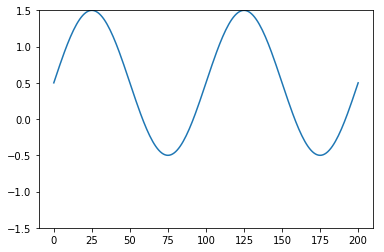

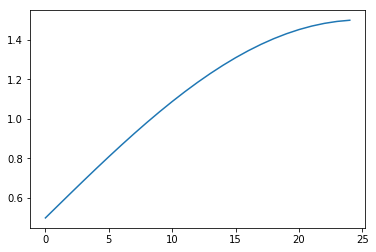

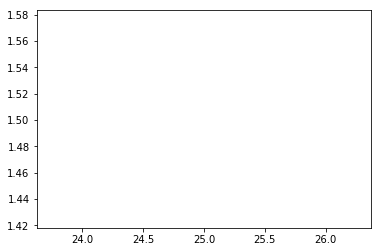

In [87]:
rnn.test()

Train on 158 samples, validate on 18 samples
Epoch 1/500
158/158 [==============================] - 0s 3ms/step - loss: 0.5041 - val_loss: 0.3806
Epoch 2/500
158/158 [==============================] - 0s 280us/step - loss: 0.3941 - val_loss: 0.2527
Epoch 3/500
158/158 [==============================] - 0s 257us/step - loss: 0.2193 - val_loss: 0.0970
Epoch 4/500
158/158 [==============================] - 0s 256us/step - loss: 0.0850 - val_loss: 0.0586
Epoch 5/500
158/158 [==============================] - 0s 270us/step - loss: 0.0612 - val_loss: 0.0802
Epoch 6/500
158/158 [==============================] - 0s 270us/step - loss: 0.0449 - val_loss: 0.0376
Epoch 7/500
158/158 [==============================] - 0s 264us/step - loss: 0.0390 - val_loss: 0.0334
Epoch 8/500
158/158 [==============================] - 0s 286us/step - loss: 0.0388 - val_loss: 0.0293
Epoch 9/500
158/158 [==============================] - 0s 272us/step - loss: 0.0312 - val_loss: 0.0344
Epoch 10/500
158/158 [========

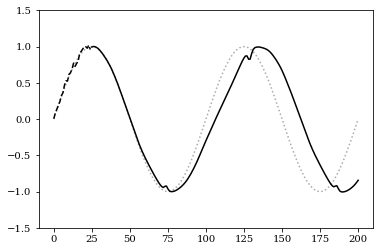

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import SimpleRNN
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

np.random.seed(0)


def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)


def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise


'''
データの生成
'''
T = 100
f = toy_problem(T)

length_of_sequences = 2 * T
maxlen = 25  # ひとつの時系列データの長さ

data = []
target = []

for i in range(0, length_of_sequences - maxlen + 1):
    data.append(f[i: i + maxlen])
    target.append(f[i + maxlen])

X = np.array(data).reshape(len(data), maxlen, 1)
Y = np.array(target).reshape(len(data), 1)

# データ設定
N_train = int(len(data) * 0.9)
N_validation = len(data) - N_train

X_train, X_validation, Y_train, Y_validation = \
    train_test_split(X, Y, test_size=N_validation)

'''
モデル設定
'''
n_in = len(X[0][0])  # 1
n_hidden = 20
n_out = len(Y[0])  # 1


def weight_variable(shape, name=None):
    return np.random.normal(scale=.01, size=shape)


early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

model = Sequential()
model.add(SimpleRNN(n_hidden,
                    kernel_initializer=weight_variable,
                    input_shape=(maxlen, n_in)))
model.add(Dense(n_out, kernel_initializer=weight_variable))
model.add(Activation('linear'))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='mean_squared_error',
              optimizer=optimizer)

'''
モデル学習
'''
epochs = 500
batch_size = 10

model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_validation, Y_validation),
          callbacks=[early_stopping])

'''
出力を用いて予測
'''
truncate = maxlen
Z = X[:1]  # 元データの最初の一部だけ切り出し

original = [f[i] for i in range(maxlen)]
predicted = [None for i in range(maxlen)]

for i in range(length_of_sequences - maxlen + 1):
    z_ = Z[-1:]
    y_ = model.predict(z_)
    sequence_ = np.concatenate(
        (z_.reshape(maxlen, n_in)[1:], y_),
        axis=0).reshape(1, maxlen, n_in)
    Z = np.append(Z, sequence_, axis=0)
    predicted.append(y_.reshape(-1))

'''
グラフで可視化
'''
plt.rc('font', family='serif')
plt.figure()
plt.ylim([-1.5, 1.5])
plt.plot(toy_problem(T, ampl=0), linestyle='dotted', color='#aaaaaa')
plt.plot(original, linestyle='dashed', color='black')
plt.plot(predicted, color='black')
plt.show()

In [1]:
from data_generator import WaveData

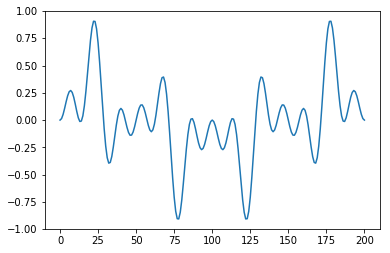

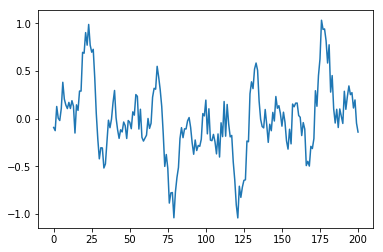

In [6]:
wave = WaveData(ampl=0.2)
wave.generate()
wave.plot()
wave.add_noise()
wave.plot()

In [4]:
import matplotlib.pyplot as plt
import numpy as np

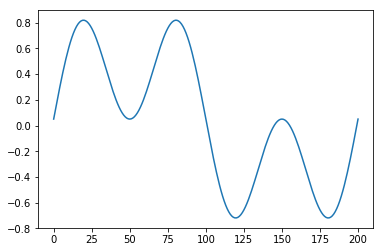

In [6]:
plt.plot(np.arange(0,201),wave)

In [3]:
print(wave)

[ 0.05        0.11275954  0.17508592  0.23654971  0.29672889  0.35521248
  0.41160405  0.46552515  0.5166185   0.56455109  0.60901699  0.64973997
  0.6864758   0.71901433  0.74718123  0.77083942  0.7898902   0.80427399
  0.81397075  0.81900007  0.81942088  0.81533084  0.80686533  0.79419622
  0.77753017  0.75710678  0.73319631  0.70609722  0.67613346  0.64365145
  0.60901699  0.57261191  0.53483058  0.49607639  0.45675808  0.41728603
  0.37806858  0.33950835  0.3019986   0.26591968  0.23163563  0.19949091
  0.16980727  0.14288087  0.11897966  0.09834091  0.08116911  0.06763414
  0.05786974  0.0519723   0.05        0.0519723   0.05786974  0.06763414
  0.08116911  0.09834091  0.11897966  0.14288087  0.16980727  0.19949091
  0.23163563  0.26591968  0.3019986   0.33950835  0.37806858  0.41728603
  0.45675808  0.49607639  0.53483058  0.57261191  0.60901699  0.64365145
  0.67613346  0.70609722  0.73319631  0.75710678  0.77753017  0.79419622
  0.80686533  0.81533084  0.81942088  0.81900007  0

In [7]:
from data_generator import WaveData

ImportError: cannot import name 'WaveData'

In [1]:
from data_generator import MultiRandomWave

In [2]:
radom_wave = MultiRandomWave(T=300)

[215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340
 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376
 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412
 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430
 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448
 449 450 451 452 453 454 455 456 457 458 459 460 46

In [3]:
radom_wave.generate()

[array([ 1.54666364e-03, -5.58941051e-06, -1.11491775e-03,  2.36535676e-03,
         1.24977945e-03,  9.14095037e-05,  1.92631138e-05, -1.31490157e-03,
         6.32675768e-03, -1.41152094e-05,  2.17230418e-04, -2.67698288e-07,
        -1.00990361e-05, -2.00075101e-04,  1.25875431e-03,  3.91895719e-03,
         4.77981947e-03,  2.04099181e-01,  2.01719075e-03,  4.21160926e-04,
        -3.80239517e-01, -1.14941623e-03, -1.56765972e-03, -7.68020021e-02,
         1.16435382e-03, -2.25988289e-03, -6.10158272e-04,  1.30270701e-04,
         3.33137505e-04,  1.54673619e-05,  1.47028020e-04, -7.77686579e-03,
         1.72103020e-07,  5.75198679e-06,  1.50856540e-02, -6.64712293e-03,
        -3.66819789e-01, -9.46993865e-02,  9.62072100e-04,  8.07074629e-04,
        -2.20983359e-02, -1.83574328e-03, -6.25434883e-04,  4.00298505e-02,
         1.05305911e-02,  1.96153106e-02,  1.58583873e-04,  4.37216744e-04,
        -2.92884452e-05, -1.53267122e-03,  2.34109640e-02,  7.57525738e-03,
        -8.0

In [4]:
radom_wave.add_noise()

[array([-4.42615528e-03, -8.72801125e-03,  8.82899715e-03,  9.28076068e-03,
         2.83812868e-03,  2.64264413e-03,  1.78047727e-03,  7.21905140e-03,
         1.25221980e-02, -8.27034280e-03,  1.73942243e-03, -5.07931344e-03,
         8.27595847e-03, -1.22593141e-03, -3.38404107e-03,  7.89237826e-03,
        -3.54277496e-03,  1.97852813e-01,  1.08169441e-02,  4.72032250e-03,
        -3.72695261e-01,  1.10312976e-03,  2.63595221e-03, -7.75075637e-02,
         6.86370437e-04, -1.13610198e-02, -5.63481769e-03,  8.70556825e-03,
         1.99184288e-03,  8.30751801e-03, -2.26146298e-03, -6.54438346e-03,
         3.66659856e-04, -8.37136126e-03,  1.57184757e-02, -1.27561686e-03,
        -3.74714470e-01, -8.63356621e-02,  7.10189647e-03,  5.22914867e-03,
        -1.44841885e-02, -1.73034019e-04, -7.12192351e-03,  3.49365182e-02,
         1.04285160e-02,  2.27827068e-02, -7.48127107e-03,  1.66508794e-03,
        -8.36017249e-03,  5.76424785e-03,  2.87037712e-02,  1.66356197e-02,
        -5.7

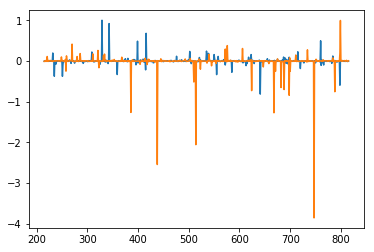

In [5]:
radom_wave.plot()

In [6]:
import numpy as np
np.arange(100,200)

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199])

In [15]:
radom_wave.wave_list[0]/max(radom_wave.wave_list[0])

array([-1.44768917e-02, -2.09269251e-03,  4.34210508e-02,  2.64528519e-02,
        2.17687259e-01,  3.65617924e-02, -8.81521272e-02, -3.64319408e-03,
       -2.39428358e-02,  6.79401421e-02, -1.93462967e-03, -5.51158928e-01,
        4.00623155e-02, -4.30072166e-02, -2.51003543e-02,  1.22151510e-01,
        1.31972452e-01, -1.02338581e-01, -2.08144177e-02, -2.77803255e-01,
        2.02421259e-01,  4.25682957e-02,  1.10124670e-01, -2.88715190e-03,
       -1.46855291e-02, -1.80288409e-01,  2.98356442e-02,  5.69608148e-04,
        3.73879656e-02, -3.19425290e-02, -3.51405466e-02,  4.60773561e-02,
       -4.68519815e-02, -6.14725204e-03, -2.41775789e-02, -4.41637027e-03,
        4.73882265e-02, -1.79025833e-02,  4.70648412e-02, -2.80552841e-02,
        3.90108181e-02, -1.39209314e-01,  6.16385948e-02, -2.99108807e-02,
        4.40527036e-02,  3.12835499e-02,  2.41317057e-01, -1.80378306e-01,
       -3.02766582e-02, -9.52404713e-02,  1.29894064e-01,  2.07206040e-01,
       -2.07378843e-02,  